In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [2]:
sns.set(palette='colorblind', font_scale=1.3)

In [3]:
db_path = os.path.join(os.getcwd(), 'data/condensed_traits/db/seq.db')
engine = create_engine(f'sqlite+pysqlite:///{db_path}')

In [4]:
query = "select * from species_traits"
traits = pd.read_sql(query, engine)
traits.head()

,species_taxid,species,genus,family,order,class,phylum,superkingdom,gram_stain,metabolism,...,genome_size.stdev,gc_content.stdev,coding_genes.stdev,optimum_tmp.stdev,optimum_ph.stdev,growth_tmp.stdev,rRNA16S_genes.stdev,tRNA_genes.stdev,data_source,ref_id
0,7,Azorhizobium caulinodans,Azorhizobium,Xanthobacteraceae,Rhizobiales,Alphaproteobacteria,Proteobacteria,Bacteria,negative,aerobic,...,1.000,NaN,7.572,NaN,NaN,NaN,0.0,0.000,"engqvist, genbank, gold, jemma-refseq, kegg, p...","705, 6102, 13521, 13643, 15838, 19908, 19956"
1,9,Buchnera aphidicola,Buchnera,Erwiniaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,negative,None,...,81529.139,1.855,82.983,NaN,NaN,0.000,0.0,0.566,"genbank, gold, jemma-refseq, kegg, microbe-dir...","5601, 9112, 9158, 9864, 9910, 10313, 10358, 10..."
2,11,Cellulomonas gilvus,Cellulomonas,Cellulomonadaceae,Micrococcales,Actinobacteria,Actinobacteria,Bacteria,positive,facultative,...,0.447,0.007,23.587,0.0,NaN,NaN,0.0,0.000,"engqvist, faprotax, genbank, gold, jemma-refse...","705, 1030, 6289, 13521, 13874, 16639, 19891, 1..."
3,14,Dictyoglomus thermophilum,Dictyoglomus,Dictyoglomaceae,Dictyoglomales,Dictyoglomia,Dictyoglomi,Bacteria,negative,anaerobic,...,1.342,0.000,31.086,0.0,NaN,5.869,0.0,0.000,"corkrey, engqvist, genbank, gold, jemma-refseq...","436, 705, 6230, 13521, 14083, 16003, 19891, 19..."
4,19,Pelobacter carbinolicus,Pelobacter,Desulfuromonadaceae,Desulfuromonadales,Deltaproteobacteria,Proteobacteria,Bacteria,negative,anaerobic,...,138769.146,0.000,72.016,NaN,NaN,NaN,0.0,0.000,"engqvist, faprotax, genbank, gold, jemma-refse...","705, 760, 5944, 13521, 14696, 15514, 19891, 19..."


In [5]:
traits.columns

Index(['species_taxid', 'species', 'genus', 'family', 'order', 'class',
       'phylum', 'superkingdom', 'gram_stain', 'metabolism', 'pathways',
       'carbon_substrates', 'sporulation', 'motility', 'range_tmp',
       'range_salinity', 'cell_shape', 'isolation_source', 'd1_lo', 'd1_up',
       'd2_lo', 'd2_up', 'doubling_h', 'genome_size', 'gc_content',
       'coding_genes', 'optimum_tmp', 'optimum_ph', 'growth_tmp',
       'rRNA16S_genes', 'tRNA_genes', 'gram_stain.count', 'metabolism.count',
       'pathways.count', 'carbon_substrates.count', 'sporulation.count',
       'motility.count', 'range_tmp.count', 'range_salinity.count',
       'cell_shape.count', 'isolation_source.count', 'gram_stain.prop',
       'metabolism.prop', 'pathways.prop', 'carbon_substrates.prop',
       'sporulation.prop', 'motility.prop', 'range_tmp.prop',
       'range_salinity.prop', 'cell_shape.prop', 'isolation_source.prop',
       'd1_lo.count', 'd1_up.count', 'd2_lo.count', 'd2_up.count',
       'doubl

In [34]:
trait = 'rRNA16S_genes'
traits[['species_taxid', trait]].groupby(trait).count().sort_values('species_taxid', ascending=False)

,species_taxid
rRNA16S_genes,
2.000,316
3.000,265
4.000,233
1.000,207
6.000,139
...,...
4.933,1
4.900,1
4.800,1


In [35]:
traits['rRNA16S_genes'].describe()

count    1740.000000
mean        4.295890
std         2.745868
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        17.000000
Name: rRNA16S_genes, dtype: float64

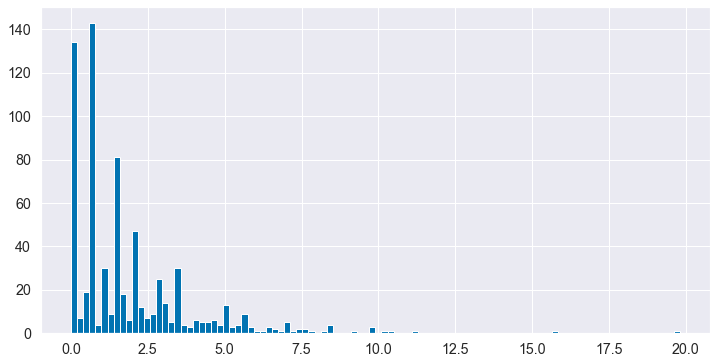

In [6]:
_, ax = plt.subplots(1, 1, figsize=(12, 6))
traits[traits['growth_tmp.stdev'].notnull()]['growth_tmp.stdev'].hist(ax=ax, bins=100);

In [7]:
candidates = traits[
    (traits['growth_tmp.stdev'].notnull()) &
    (traits['growth_tmp.stdev'] > 0) &
    (traits['growth_tmp.stdev'] < 5)
]

In [8]:
candidates['data_source']

6       engqvist, genbank, gold, jemma-refseq, kegg, m...
7            engqvist, genbank, gold, kegg, patric, rrndb
12      engqvist, faprotax, genbank, gold, jemma-refse...
17      engqvist, faprotax, genbank, gold, jemma-refse...
23      corkrey, engqvist, genbank, gold, jemma-refseq...
                              ...                        
2164          campedelli, engqvist, genbank, gold, patric
2166                                    corkrey, engqvist
2171                    corkrey, engqvist, fierer, patric
2182                 campedelli, engqvist, fierer, patric
2264                      engqvist, genbank, gold, patric
Name: data_source, Length: 525, dtype: object

In [9]:
[c for c in traits.columns if 'growth_tmp' in c]

['growth_tmp', 'growth_tmp.count', 'growth_tmp.stdev']

In [10]:
candidates.iloc[10][['species', 'growth_tmp']]

species       Elizabethkingia meningoseptica
growth_tmp                                34
Name: 53, dtype: object